In [63]:
import pandas as pd
import matplotlib.pyplot as plt


df_post = pd.read_csv(r'C:\Users\ende\Desktop\10x\Week-4\post.csv')
df_google=pd.read_csv(r'C:\Users\ende\Desktop\10x\Week-4\googleplay.csv')
df_cbe_sub=pd.read_csv(r'C:\Users\ende\Desktop\10x\Week-4\cbe.csv')
df_global_sub=pd.read_csv(r'C:\Users\ende\Desktop\10x\Week-4\globalbank.csv')
df_boa_sub=pd.read_csv(r'C:\Users\ende\Desktop\10x\Week-4\boa.csv')


In [67]:
df_post.head()

,id,views,date,imageLink,Bank
0,86450,250400,"March 28, 2024",https://t.me/tikvahethiopia/86450,CBE
1,86164,303200,"March 20, 2024",https://t.me/tikvahethiopia/86164,CBE
2,85979,270600,"March 14, 2024",https://t.me/tikvahethiopia/85979,CBE
3,85379,213300,"February 22, 2024",https://t.me/tikvahethiopia/85379,CBE
4,85187,249700,"February 15, 2024",https://t.me/tikvahethiopia/85187,CBE


In [64]:
# Convert date to datetime format
df_post['date'] = pd.to_datetime(df_post['date'] + ' 2024', format='%b %d at %H:%M %Y', errors='coerce')

# Convert date to desired format
df_post['date'] = df_post['date'].dt.strftime('%B %d, %Y')

In [66]:
# Convert views to numeric format
df_post['views'] = df_post['views'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float).astype(int)


In [68]:
df_google['name'] = df_google['name'].str.replace('\nmore_vert', '', regex=True)


In [74]:
df_google.shape

(9, 5)

In [75]:
df_boa_sub['Bank']='BOA'
df_cbe_sub['Bank']='CBE'
df_global_sub['Bank']='GB'

In [76]:
df_sub = pd.concat([df_boa_sub, df_cbe_sub, df_global_sub])
df_sub = df_sub.sample(frac=1)
df_sub.head()


,Date,Numberofsubscribers,increament,Bank
71,13.03.24,102977,-50,CBE
109,04.02.24,99592,103,CBE
129,15.01.24,166234,82,BOA
25,28.04.24,161327,-63,BOA
12,11.05.24,47328,641,GB


In [26]:
df_sub.dtypes

Date                   datetime64[ns]
Numberofsubscribers             int64
increament                      int64
Bank                           object
dtype: object

In [41]:
df_post.dtypes

id                    int64
views                object
date         datetime64[ns]
imageLink            object
Bank                 object
dtype: object

In [40]:
df_google.dtypes

name               object
date       datetime64[ns]
message            object
stars               int64
bank               object
dtype: object

In [33]:
df_google['name']=df_google['name'].astype(str)

In [24]:
type(df_google['name'].iloc[0])


str

In [77]:
df_sub['Date']=pd.to_datetime(df_sub['Date'])

C:\Users\ende\AppData\Local\Temp\ipykernel_8016\3908673288.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sub['Date']=pd.to_datetime(df_sub['Date'])


In [78]:
# data summerization
# Data Summarization
print("1. Data Summarization:")
print("df_sub:")
print(df_sub.info())
print("\n")

print("df_post:")
print(df_post.info())
print("\n")

print("df_google:")
print(df_google.info())
print("\n")


1. Data Summarization:
df_sub:
<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 71 to 85
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 450 non-null    datetime64[ns]
 1   Numberofsubscribers  450 non-null    int64         
 2   increament           450 non-null    int64         
 3   Bank                 450 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 17.6+ KB
None


df_post:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         35 non-null     int64 
 1   views      35 non-null     int32 
 2   date       35 non-null     object
 3   imageLink  29 non-null     object
 4   Bank       35 non-null     object
dtypes: int32(1), int64(1), object(3)
memory usage: 1.4+ KB
None




In [79]:
# data quality assessment

print("2. Data Quality Assessment:")
print("Missing Values:")
print("df_sub:")
print(df_sub.isnull().sum())
print("\n")

print("df_post:")
print(df_post.isnull().sum())
print("\n")

print("df_google:")
print(df_google.isnull().sum())
print("\n")

print("Duplicates:")
print("df_sub:")
print(df_sub.duplicated().sum())
print("\n")

print("df_post:")
print(df_post.duplicated().sum())
print("\n")

print("df_google:")
print(df_google.duplicated().sum())
print("\n")


2. Data Quality Assessment:
Missing Values:
df_sub:
Date                   0
Numberofsubscribers    0
increament             0
Bank                   0
dtype: int64


df_post:
id           0
views        0
date         0
imageLink    6
Bank         0
dtype: int64


df_google:
name       0
date       0
message    0
stars      0
bank       0
dtype: int64


Duplicates:
df_sub:
3


df_post:
0


df_google:
0




3. Univariate Analysis:


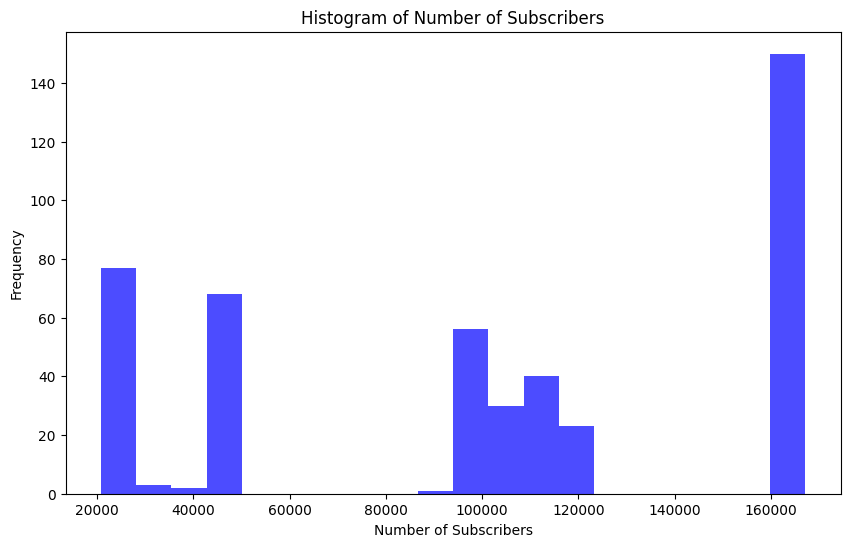

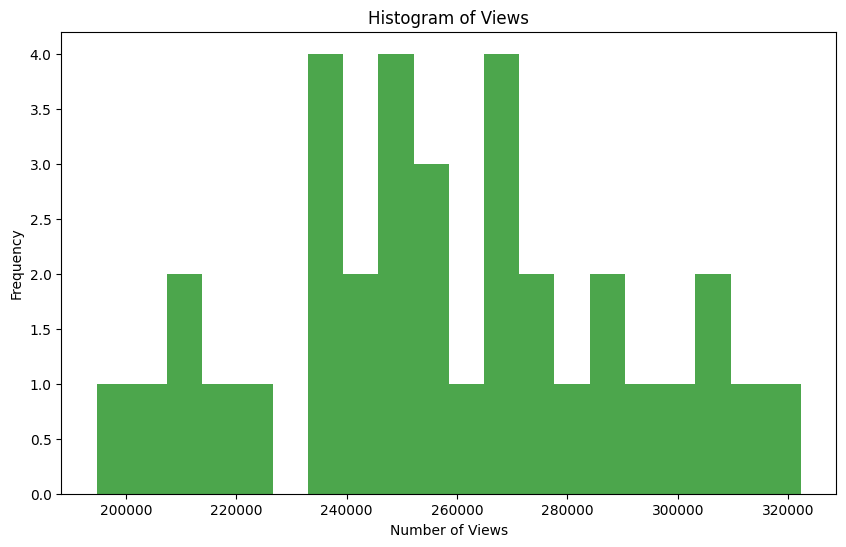

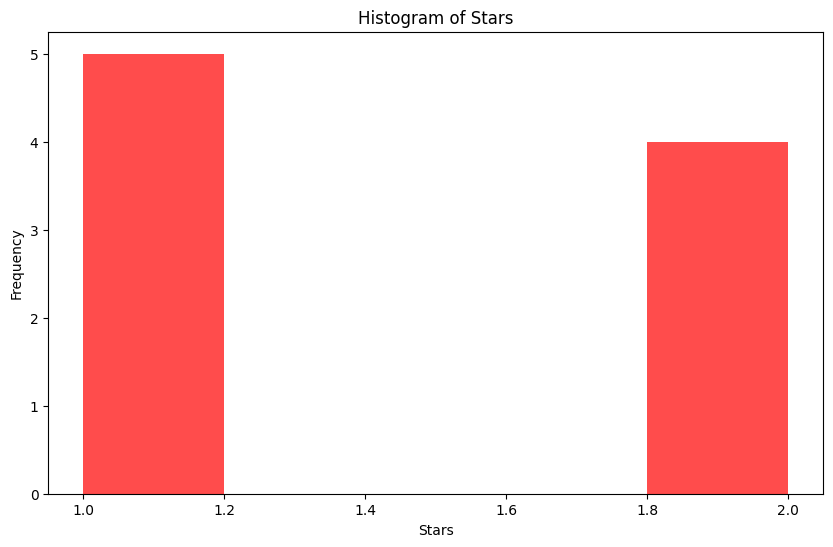

In [81]:
# Univariate Analysis
import matplotlib.pyplot as plt

print("3. Univariate Analysis:")
# For df_sub
plt.figure(figsize=(10, 6))
plt.hist(df_sub['Numberofsubscribers'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Number of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Frequency')
plt.show()

# For df_post
plt.figure(figsize=(10, 6))
plt.hist(df_post['views'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Views')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()

# For df_google
plt.figure(figsize=(10, 6))
plt.hist(df_google['stars'], bins=5, color='red', alpha=0.7)
plt.title('Histogram of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()


In [45]:
df_google['stars'].unique()

array([1, 2], dtype=int64)

In [47]:
df_google.columns

Index(['name', 'date', 'message', 'stars', 'bank'], dtype='object')

In [83]:
df_sub.columns


Index(['Date', 'Numberofsubscribers', 'increament', 'Bank'], dtype='object')

4. Bivariate or Multivariate Analysis:


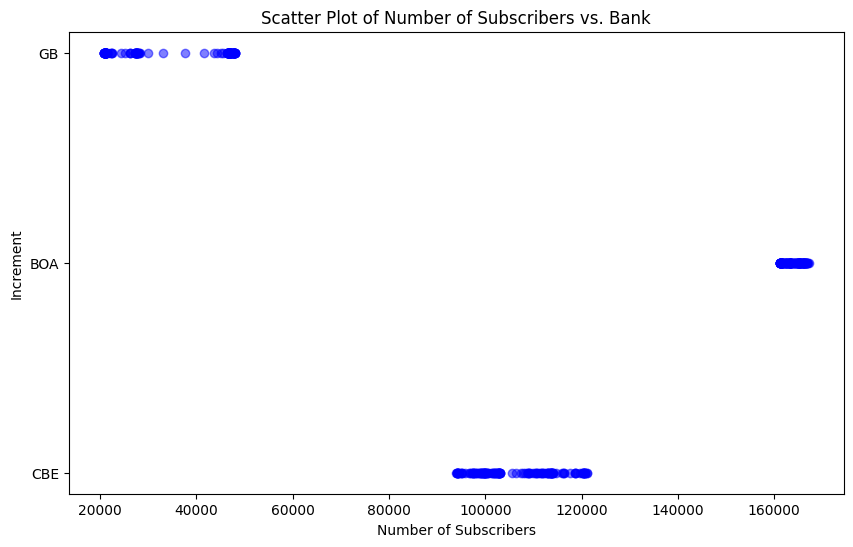

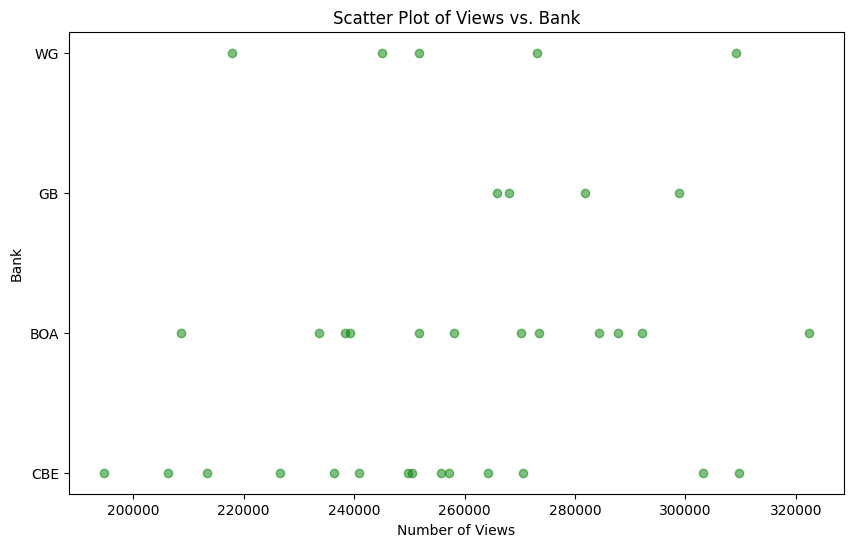

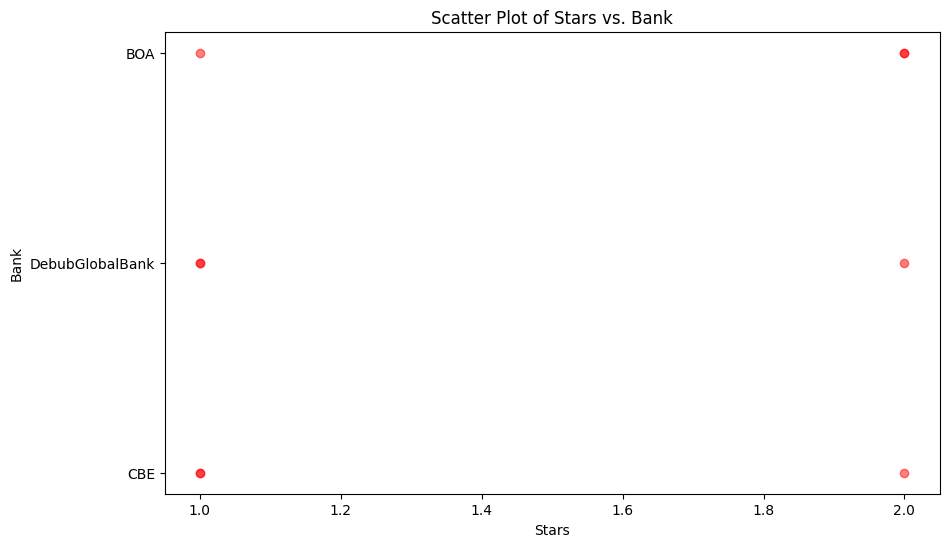

In [84]:
# Bivariate or Multivariate Analysis
print("4. Bivariate or Multivariate Analysis:")
# Scatter plot for df_sub
plt.figure(figsize=(10, 6))
plt.scatter(df_sub['Numberofsubscribers'], df_sub['Bank'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Number of Subscribers vs. Bank')
plt.xlabel('Number of Subscribers')
plt.ylabel('Increment')
plt.show()

# Scatter plot for df_post
plt.figure(figsize=(10, 6))
plt.scatter(df_post['views'], df_post['Bank'], color='green', alpha=0.5)
plt.title('Scatter Plot of Views vs. Bank')
plt.xlabel('Number of Views')
plt.ylabel('Bank')
plt.show()

# Scatter plot for df_google
plt.figure(figsize=(10, 6))
plt.scatter(df_google['stars'], df_google['bank'], color='red', alpha=0.5)
plt.title('Scatter Plot of Stars vs. Bank')
plt.xlabel('Stars')
plt.ylabel('Bank')
plt.show()


In [85]:
# Data Enrichment
print("5. Data Enrichment:")
#  Extract month and year from date columns
df_post['date'] = pd.to_datetime(df_post['date'])
df_post['month'] = df_post['date'].dt.month
df_post['year'] = df_post['date'].dt.year

print("Enriched df_post:")
print(df_post.head())
print("\n")


5. Data Enrichment:
Enriched df_post:
      id   views       date                          imageLink Bank  month  \
0  86450  250400 2024-03-28  https://t.me/tikvahethiopia/86450  CBE      3   
1  86164  303200 2024-03-20  https://t.me/tikvahethiopia/86164  CBE      3   
2  85979  270600 2024-03-14  https://t.me/tikvahethiopia/85979  CBE      3   
3  85379  213300 2024-02-22  https://t.me/tikvahethiopia/85379  CBE      2   
4  85187  249700 2024-02-15  https://t.me/tikvahethiopia/85187  CBE      2   

   year  
0  2024  
1  2024  
2  2024  
3  2024  
4  2024  




In [86]:
# Data Comparison
print("6. Data Comparison:")
# Compare statistics between different datasets
print("Summary Statistics for df_sub:")
print(df_sub.describe())
print("\n")

print("Summary Statistics for df_post:")
print(df_post.describe())
print("\n")

print("Summary Statistics for df_google:")
print(df_google.describe())
print("\n")


6. Data Comparison:
Summary Statistics for df_sub:
                                Date  Numberofsubscribers   increament
count                            450           450.000000   450.000000
mean   2024-04-19 17:32:48.000000256        101439.722222   114.393333
min              2023-12-26 00:00:00         20816.000000  -230.000000
25%              2024-02-15 00:00:00         46895.750000   -58.750000
50%              2024-03-30 12:00:00        102942.000000     2.000000
75%              2024-05-20 00:00:00        162141.000000   110.250000
max              2024-12-05 00:00:00        167143.000000  4643.000000
std                              NaN         53701.798913   437.070220


Summary Statistics for df_post:
                 id          views                           date      month  \
count     35.000000      35.000000                             35  35.000000   
mean   85543.200000  258565.714286  2024-02-27 08:13:42.857142784   2.400000   
min    84193.000000  194700.000000  

7. Trends Over Time:


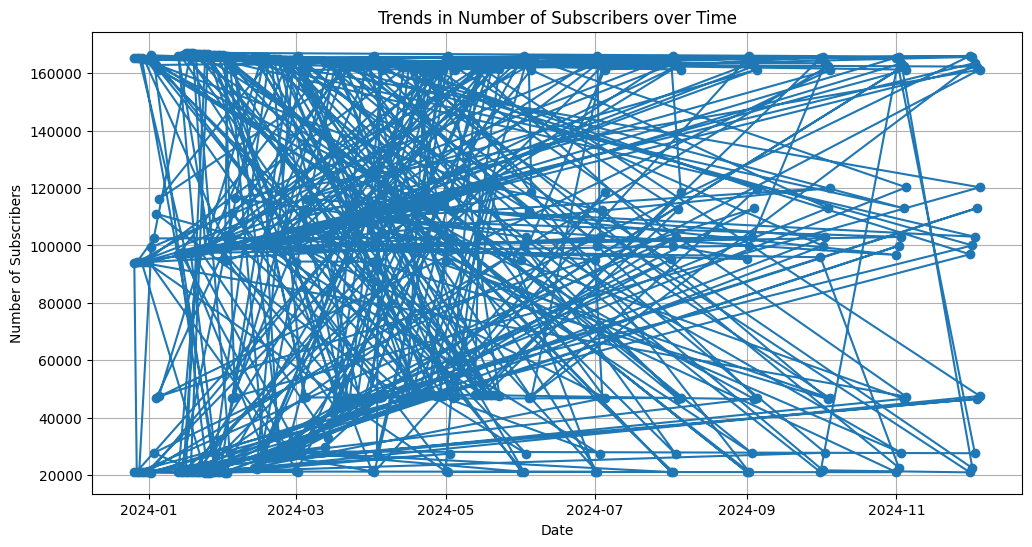

In [87]:
# Trends Over Time
print("7. Trends Over Time:")
# Example: Trends in Number of Subscribers over time
df_sub['Date'] = pd.to_datetime(df_sub['Date'], format='%d.%m.%y')
plt.figure(figsize=(12, 6))
plt.plot(df_sub['Date'], df_sub['Numberofsubscribers'], marker='o', linestyle='-')
plt.title('Trends in Number of Subscribers over Time')
plt.xlabel('Date')
plt.ylabel('Number of Subscribers')
plt.grid(True)
plt.show()


In [99]:
# Correlation between different datasets
# Clean 'stars' column in df_google (if needed)
df_google['stars'] = pd.to_numeric(df_google['stars'], errors='coerce')

# Now calculate the correlation


print("8. Correlation between different datasets:")
# Example: Correlation between views and stars in df_post and df_google
correlation_df_post = df_post['views'].corr(df_post['month'])
#correlation_df_google = df_google['stars'].corr(df_google['year'])

print("Correlation between views and Month in df_post:", correlation_df_post)
#print("Correlation between stars and Month in df_google:", correlation_df_google)
print("\n")


8. Correlation between different datasets:
Correlation between views and Month in df_post: 0.5939523205459396




In [94]:
df_post.columns

Index(['id', 'views', 'date', 'imageLink', 'Bank', 'month', 'year'], dtype='object')

9. Outlier Detection:


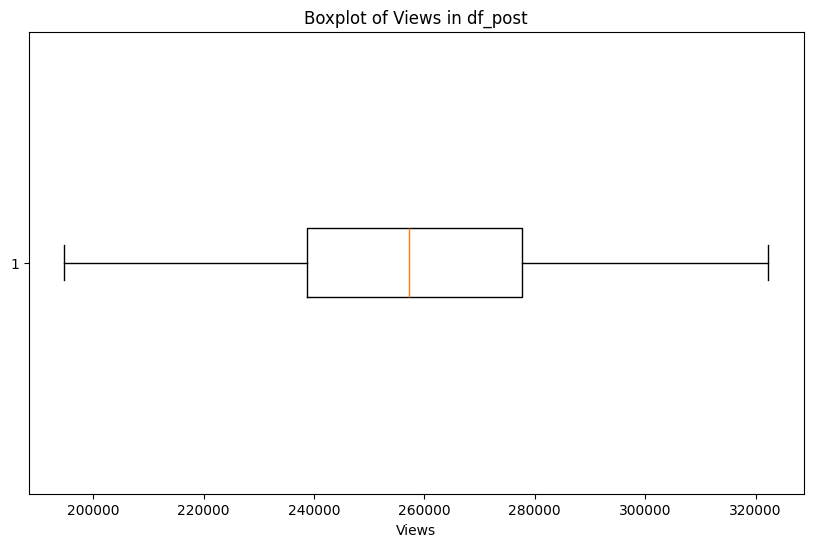

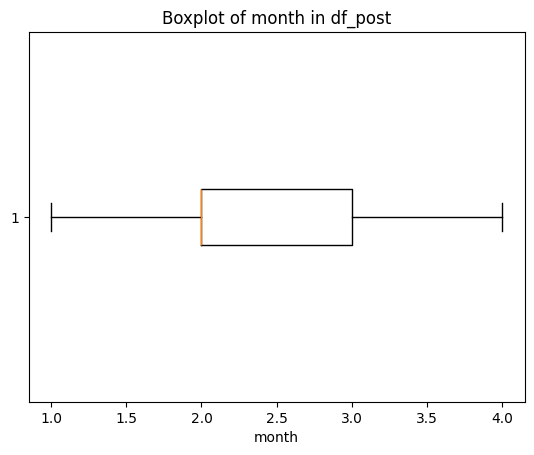

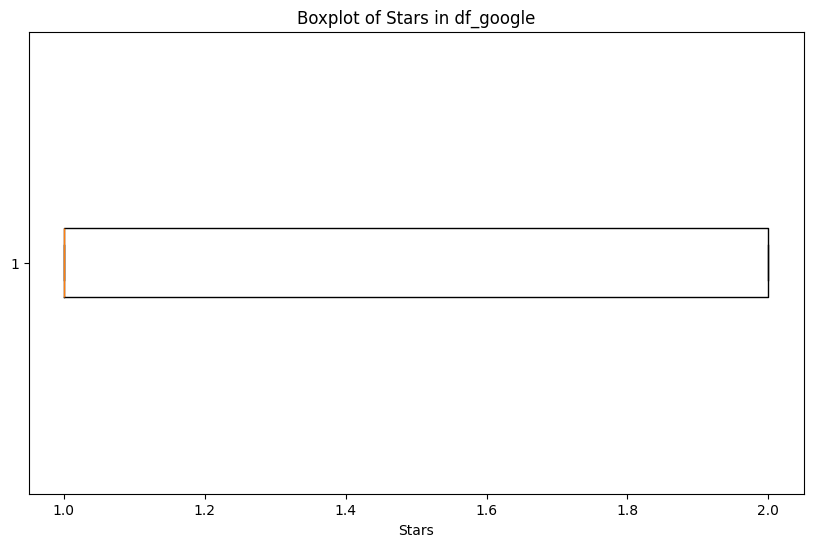

In [101]:
# Outlier Detection using boxplots
print("9. Outlier Detection:")
# Example: Outlier detection using boxplots
plt.figure(figsize=(10, 6))
# Convert 'views' column to numeric if it's not already
df_post['views'] = pd.to_numeric(df_post['views'], errors='coerce')
plt.boxplot(df_post['views'].dropna(), vert=False)
plt.title('Boxplot of Views in df_post')
plt.xlabel('Views')
plt.show()
df_post['month'] = pd.to_numeric(df_post['month'], errors='coerce')
plt.boxplot(df_post['month'].dropna(), vert=False)
plt.title('Boxplot of month in df_post')
plt.xlabel('month')
plt.show()

plt.figure(figsize=(10, 6))
# Convert 'stars' column to numeric if it's not already
df_google['stars'] = pd.to_numeric(df_google['stars'], errors='coerce')
plt.boxplot(df_google['stars'].dropna(), vert=False)
plt.title('Boxplot of Stars in df_google')
plt.xlabel('Stars')
plt.show()


10. Visualization:


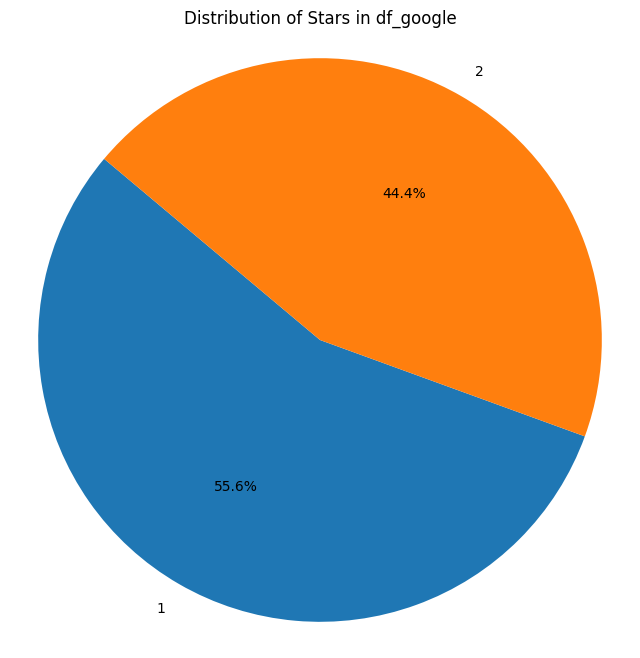

In [102]:
# Visualization
print("10. Visualization:")
# Example: Pie chart for distribution of stars in df_google
stars_counts = df_google['stars'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(stars_counts, labels=stars_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Stars in df_google')
plt.axis('equal')
plt.show()
